In [1]:
#Lab 7: Pendulum Motion
#Lab Partners: Ravi Kini (working alone)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

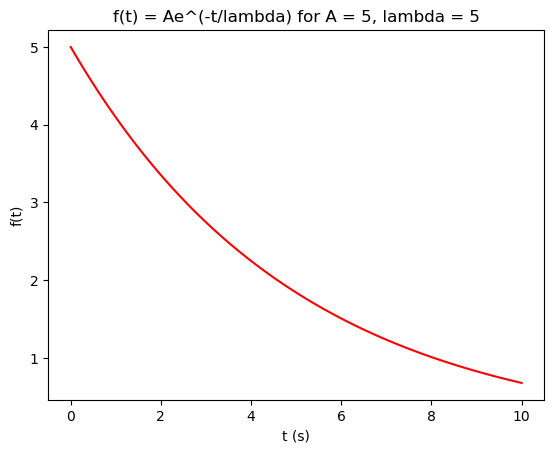

In [2]:
#7.1
A = 5
llambda = 5
def f(t):
    return A * np.exp(-t/llambda)

UPPER = 10
LOWER = 0
t = np.linspace(LOWER, UPPER, 100)
plt.plot(t, f(t), "r-")
plt.xlabel("t (s)")
plt.ylabel("f(t)")
plt.title("f(t) = Ae^(-t/lambda) for A = 5, lambda = 5")
plt.show()

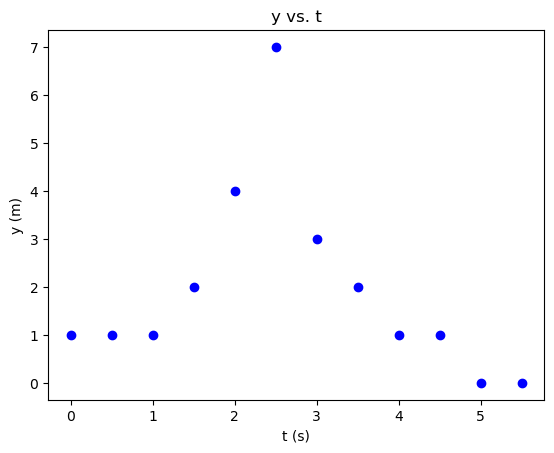

In [3]:
#7.2
yarr = np.array([1,1,1,2,4,7,3,2,1,1,0,0])
tau = 0.5
t = np.arange(yarr.size)*tau
plt.plot(t, yarr, "bo")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.title("y vs. t")
plt.show()

In [4]:
#7.3
L = 1
g = 9.8
wL = np.sqrt(g/L)
#the units is 1/seconds
print(wL)

3.1304951684997055


In [5]:
#7.4
TL = 1
#TL = 2pi/wL -> wL = 2pi/TL
wL = 2*np.pi/TL
#the units is seconds
print(wL)
#TL = 2pi*sqrt(L/g) -> L = (TL/2pi)^2*g
L = (TL/(2*np.pi))**2 * g
#the units is meters
print(L)

6.283185307179586
0.2482368999237276


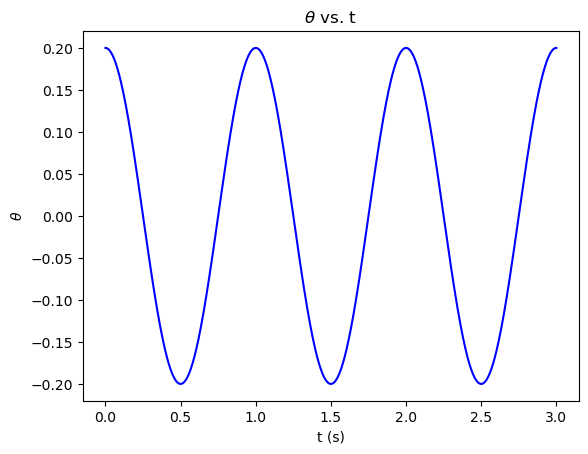

In [6]:
#7.5
TL = 1
wL = 2*np.pi/TL
A = 0.2
t = np.linspace(0, 3, 1000)
plt.plot(t, A*np.cos(wL * t), "b-")
#theta(t) = A*cos(wL * t)
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show()

In [7]:
#7.6
def euler(tau, theta, omega, alpha):
    theta = theta + tau * omega
    omega = omega + tau * alpha
    return theta, omega

print(np.around(euler(-0.01, -0.28, -0.30, -0.06),3))
print(np.around(euler( 0.94, 0.32, -0.85, -0.86),3))
print(np.around(euler( 0.92, -0.16, 0.38, -0.32),3))
print(np.around(euler( 0.31, 0.12, -0.91, -0.76),3))
print(np.around(euler(-0.14, 0.96, 0.66, -0.73),3))

[-0.277 -0.299]
[-0.479 -1.658]
[0.19  0.086]
[-0.162 -1.146]
[0.868 0.762]


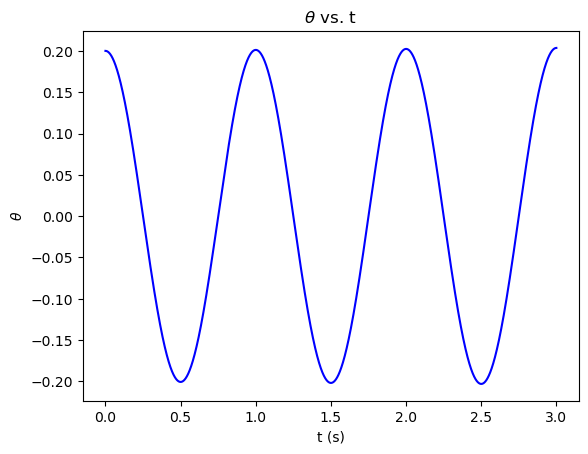

In [8]:
#7.7
N = 10000
TL = 1
wL = 2*np.pi/TL
A = 0.2
theta = A
omega = 0
tau = 0.0003
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * theta
    theta, omega = euler(tau, theta, omega, alpha)
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "b-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show()    

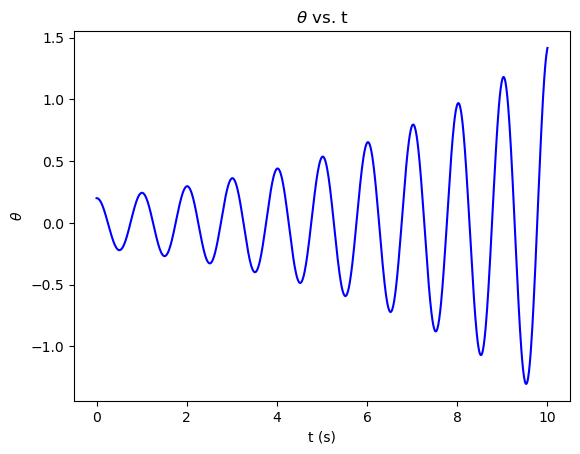

In [9]:
#7.8
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 0.2
theta = A
omega = 0
tau = 0.01
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * theta
    theta, omega = euler(tau, theta, omega, alpha)
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "b-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show()  
#energy is not conserved, and appears to be increasing

In [10]:
#7.9
def verlet(tau, theta, oldth, alpha):
    theta = 2 * theta - oldth + tau ** 2 * alpha
    return theta
print(np.around(verlet(-0.01, -0.28, -0.30, -0.06),3))
print(np.around(verlet( 0.94, 0.32, -0.85, -0.86),3))
print(np.around(verlet( 0.92, -0.16, 0.38, -0.32),3))
print(np.around(verlet( 0.31, 0.12, -0.91, -0.76),3))
print(np.around(verlet(-0.14, 0.96, 0.66, -0.73),3))

-0.26
0.73
-0.971
1.077
1.246


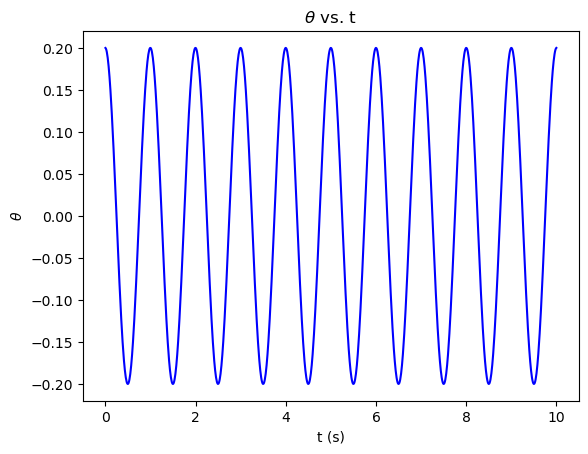

In [11]:
#7.10
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 0.2
oldth = theta = A
tau = 0.01
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * theta
    tmp = theta
    theta = verlet(tau, theta, oldth, alpha)
    oldth = tmp
    
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "b-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show()  

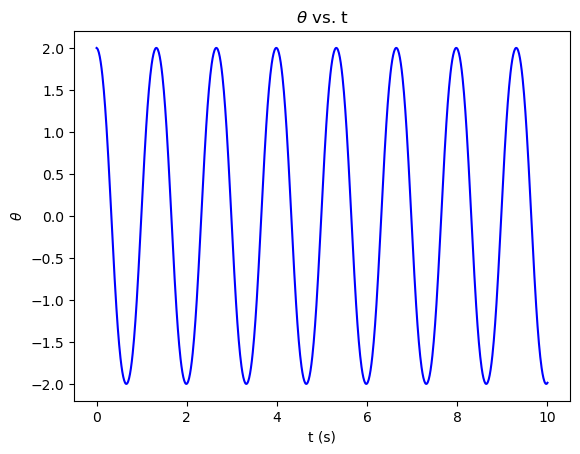

In [12]:
#7.11
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 2
oldth = theta = A
tau = 0.01
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * np.sin(theta)
    tmp = theta
    theta = verlet(tau, theta, oldth, alpha)
    oldth = tmp
    
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "b-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show() 

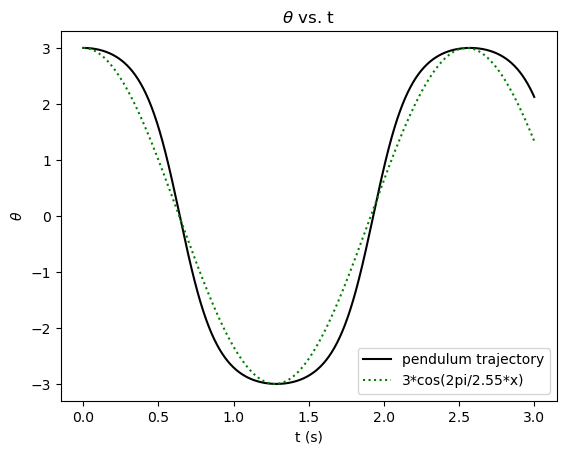

In [13]:
#7.12
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 3
oldth = theta = A
tau = 0.003
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * np.sin(theta)
    tmp = theta
    theta = verlet(tau, theta, oldth, alpha)
    oldth = tmp
    #if theta >= A - 0.001: (used to approximate value of period)
    #    print(tau * i)
    
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "k-", label="pendulum trajectory")
plt.plot(t, A*np.cos(2*np.pi/2.55*t), "g:", label="3*cos(2pi/2.55*x)")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.legend()
plt.show() 

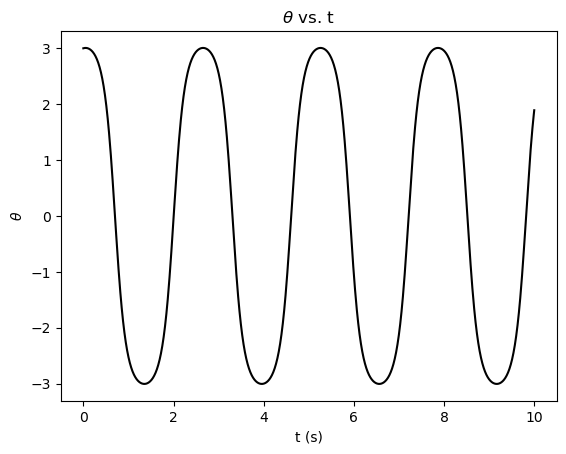

In [14]:
#7.13
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 3
V = 1
theta = A
oldth = A - tau * V
tau = 0.01
tjth = np.array([])

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * np.sin(theta)
    tmp = theta
    theta = verlet(tau, theta, oldth, alpha)
    theta = np.mod(theta + np.pi, 2*np.pi) - np.pi
    oldth = tmp
    
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "k-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show() 

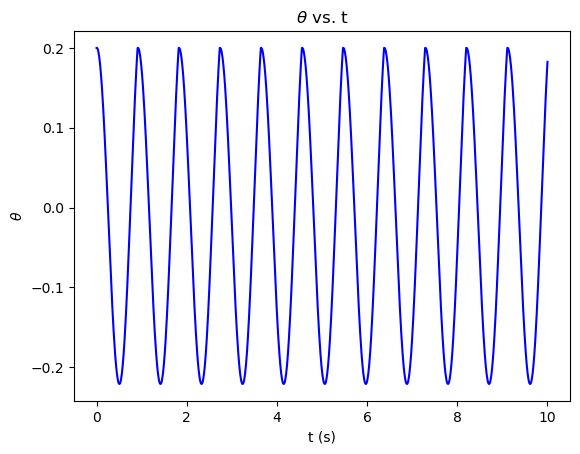

In [15]:
#7.14
N = 1000
TL = 1
wL = 2*np.pi/TL
A = 0.2
theta = A
omega = 0
tau = 0.01
tjth = np.array([])

def euler(tau, theta, omega, alpha):
    theta = theta + tau * omega
    omega = omega + tau * alpha
    if theta > A:
        theta = A
        omega = 0
        # if at max position, angular velocity is now 0 from cons of energy
    return theta, omega

for i in range(N):
    tjth = np.append(tjth, theta)
    alpha = -wL ** 2 * theta
    theta, omega = euler(tau, theta, omega, alpha)
    
t = np.linspace(0, tau * N, N)
plt.plot(t, tjth, "b-")
plt.xlabel("t (s)")
plt.ylabel("$\\theta$")
plt.title("$\\theta$ vs. t")
plt.show() 